

# Project: Investigate a Dataset - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. . In order to minimize the impact, we're replacing it with a similar set of films and data fields from The Movie Database (TMDb) in accordance with their terms of use. 

<h4> Dataset Columns </h4>

<ol>
    <li>id</li>
    <li>imdb_id</li>
    <li>popularity</li>
<li>budget</li>
    <li>revenue</li>
<li>original_title</li>
    <li>cast</li>
<li>homepage</li>
    <li>director</li>
    <li>tagline</li>
    <li>keywords</li>
    <li>overview</li>
    <li>runtime</li>
    <li>genres</li>
    <li>production_companies</li>
    <li>release_date</li>
    <li>vote_count</li>
<li>vote_average</li>
<li>release_year</li>
<li>budget_adj</li>
<li>revenue_adj</li> 
</ol>


### Question(s) for Analysis
<ul>
 <li> 1 How many movies were produced year by year?</li>
<li> 2 What features are associated with high revenue movies?
Is there a relationship between popularity and high revenue movies?If so what kind of a relationship is it?</li>
<li> 3Which production company had the most movies and which movie is  the highest grossing of all time according to the dataset??</li>
</ul>

In [3]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [11]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas == 0.25.0
!conda update  pandas=0.25.0


CondaError: Invalid spec for 'conda update': pandas=0.25.0
Use 'conda install' instead.



<a id='wrangling'></a>
## Data Wrangling



In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
df_movies = pd.read_csv(r'C:\Users\ADMIN\.jupyter\tmdb-movies.csv')
df_movies.head()
#   types and look for instances of missing or possibly errant data.
#Check names of columns
#for col in df_movies.columns:
 #print(col)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Drop rows with nulls and unnecessary columns and also check for duplicates

#### Columns needed for analysis

<ol>
    <li>id</li>
    <li>popularity</li>
<li>budget</li>
    <li>revenue</li>
<li>original_title</li>
    <li>cast</li>
    <li>director</li>
    <li>runtime</li>
    <li>genres</li>
    <li>production_companies</li>
    <li>release_date</li>
<li>release_year</li>
<li>budget_adj</li>
<li>revenue_adj</li> 
</ol>



In [5]:
#Check number of rows and columns , #check info about dataset and datatypes
df_movies.shape , df_movies.info()
#Check and remove columns with nulls
df_movies.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [5]:
#Removing nulls from production companies column
df_movies_without_nulls = df_movies.dropna(subset=['production_companies'], inplace=True)
print(df_movies_without_nulls)
#Confirming if nulls have been removed
df_movies.production_companies.isnull()
df_movies.head()


None


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
#Dropping unnecessary columns
df_movies.drop(['imdb_id','homepage','tagline','keywords','overview','vote_count','vote_average'], axis=1 ,inplace=True)
#checking if columns are removed 
df_movies.head(1)
#check for null in remaining columns
df_movies.info()
#dropping all rows with nulls/nans
new_df = df_movies.dropna(how='any' , inplace=True)
print(new_df),df_movies.isnull().sum()
df_movies.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   director              10822 non-null  object 
 7   runtime               10866 non-null  int64  
 8   genres                10843 non-null  object 
 9   production_companies  9836 non-null   object 
 10  release_date          10866 non-null  object 
 11  release_year          10866 non-null  int64  
 12  budget_adj            10866 non-null  float64
 13  revenue_adj           10866 non-null  float64
dtypes: float64(3), int64(5), object(6)
memory usage: 1.2+ MB
None


,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,1.379999e+08,1.392446e+09


In [7]:
#check remaining dataset dtypes
df_movies.dtypes

id                        int64
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [8]:
#Converting ints to float(budget and revenue)
#df_movies[['budget','revenue']].head(5)
df_movies.budget = df_movies.budget.astype(float)
df_movies.revenue = df_movies.revenue.astype(float)
df_movies.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015,1.747999e+08,1.385749e+09


## More Cleaning
I realized there are zero's in my columns which are not helpful for analysis so have to drop rows with values of zero

In [9]:
#Cleaning out rows with value zero in budget and revenue
df_movies.budget = df_movies.budget[df_movies['budget']!= 0] 
df_movies.query('budget == 0')
df_movies.revenue = df_movies.revenue[df_movies['revenue']!= 0]
df_movies.query('revenue == 0')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj


##### Drop release date column and convert release year to datetime.
 Since the release year and date both contain the year when the movie is released, to reduce redundancy we need only once column and I will remain with release year column
 

In [11]:
#checking adj_budget and adj_revenue columns for value of zero by using a function
# I am trying to make a function that removes rows with zeros and checks if they are indeed gone
#so it would return number of rows with values of zero for specific rows of a specific column
#The column_name would be the parameter passed and then when I call the  function I would pass the column name as the arguement
def removeZeros(column_name):
    column_name =  column_name[df_movies[f"{column_name}"]!= 0] 
    return print(df_movies.query({column_namej} == 0))

removeZeros(column_name = df_movies.revenue_adj)

#THIS CODE IS NOT WORKING , IDK WHERE I AM GOING WRONG






KeyError: '0        1.392446e+09\n1        3.481613e+08\n2        2.716190e+08\n3        1.902723e+09\n4        1.385749e+09\n             ...     \n10861    0.000000e+00\n10862    0.000000e+00\n10863    0.000000e+00\n10864    0.000000e+00\n10865    0.000000e+00\nName: revenue_adj, Length: 9773, dtype: float64'

In [12]:
# Actual code I was creating a function for
df_movies.revenue_adj =  df_movies.revenue_adj[df_movies['revenue_adj']!= 0] 
df_movies.query('revenue_adj == 0')
df_movies.budget_adj = df_movies.budget_adj[df_movies['budget_adj']!= 0] 
df_movies.query('budget_adj == 0') 
#check if columns budget and revenue are floats
#df_movies.dtypes
#df_movies.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj


In [13]:
df_movies.drop(['release_date'], axis=1 ,inplace=True)
df_movies.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015,1.747999e+08,1.385749e+09


In [14]:
df_movies.release_year = pd.to_datetime(df_movies.release_year, format='%Y')
df_movies.dtypes

id                               int64
popularity                     float64
budget                         float64
revenue                        float64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_year            datetime64[ns]
budget_adj                     float64
revenue_adj                    float64
dtype: object

##### Last bit of cleaning and checking the cleaned dataset if it is ready for analysis

I have done most of the cleaning, I wont check duplicates because I believe in some columns like cast or year , there maybe a lot of the same values, even the budget and revenue might be the same, however I will check duplicates in columns such as id, and  movie title 

In [15]:
df_movies['id'].duplicated()
df_movies['original_title'].duplicated()
# Check the new dimensions of this dataset
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9773 non-null   int64         
 1   popularity            9773 non-null   float64       
 2   budget                5022 non-null   float64       
 3   revenue               4751 non-null   float64       
 4   original_title        9773 non-null   object        
 5   cast                  9773 non-null   object        
 6   director              9773 non-null   object        
 7   runtime               9773 non-null   int64         
 8   genres                9773 non-null   object        
 9   production_companies  9773 non-null   object        
 10  release_year          9773 non-null   datetime64[ns]
 11  budget_adj            5022 non-null   float64       
 12  revenue_adj           4751 non-null   float64       
dtypes: datetime64[ns]

#### Number of values in budget and revenue

As  you can see the number rows of revenue and budget arent equal to the number of records in the dataset, the reason is that I removed rows with values of zero as I believed that they would not be necessary for our analysis. However value of the adjusted budget and revenue match that of the original budget and revenue

<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 (1 Which year had the most movies released)

For this question my approach is to try and find the genre that is most frequent in the column and try grouping the results by year , hopefully this should work


In [16]:
# Use this, and more code cells, to explore your data. Don't forget to add   
group_data = df_movies.groupby('release_year')
agg = group_data.aggregate({'genres': np.sum})
agg['count'] = df_movies.groupby('release_year').genres.nunique()
agg
#This code allows me to see the number of movies released in each year





,genres,count
release_year,,
1960-01-01,Drama|Horror|ThrillerAction|Adventure|WesternA...,25
1961-01-01,Adventure|Animation|Comedy|FamilyComedy|Drama|...,25
1962-01-01,Adventure|Action|ThrillerAdventure|Drama|Histo...,24
1963-01-01,Action|Thriller|AdventureAnimation|FamilyHorro...,30
1964-01-01,Adventure|Action|ThrillerDrama|Comedy|WarComed...,37
1965-01-01,Adventure|Action|ThrillerDrama|Family|Music|Ro...,32
1966-01-01,Animation|Family|ComedyDrama|Science FictionDr...,39
1967-01-01,Family|Animation|AdventureComedy|Drama|Romance...,26
1968-01-01,Science Fiction|Mystery|AdventureAdventure|Sci...,31


array([<AxesSubplot:title={'center':'Movies produced each year'}, xlabel='release_year'>],
      dtype=object)

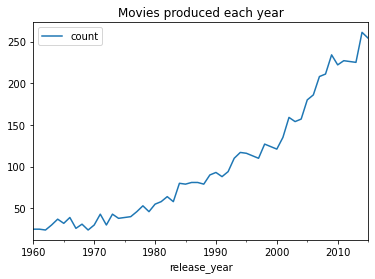

In [17]:
#Plotting the results
agg.plot(subplots=True ,title=['Movies produced each year'])

### Research Question 2  (What feature are associated with high revenue)

###### Checking if there feature or columns that affect revenue

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11680\1473594706.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plt.scatter(df_movies[{column1}], df_movies[{column2}])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11680\1473594706.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plt.scatter(df_movies[{column1}], df_movies[{column2}])


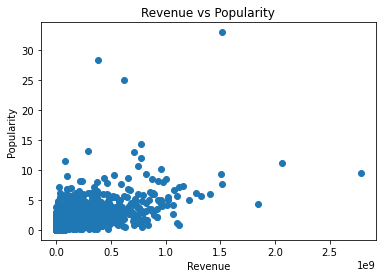

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11680\1473594706.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plt.scatter(df_movies[{column1}], df_movies[{column2}])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11680\1473594706.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plt.scatter(df_movies[{column1}], df_movies[{column2}])


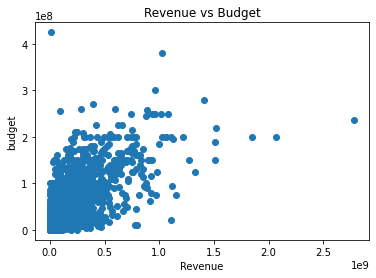

In [19]:
# Creating a function to plot a scatter plot with two variables
def PlotScatter(column1,column2,xlabel1,ylabel1,titleGraph):
    plt.scatter(df_movies[{column1}], df_movies[{column2}])
    plt.xlabel(xlabel1)
    plt.ylabel(ylabel1)
    plt.title(titleGraph)
    return plt.show()
PlotScatter("revenue","popularity","Revenue","Popularity","Revenue vs Popularity")
PlotScatter("revenue","budget","Revenue","budget","Revenue vs Budget")




##### The function above replaces this code below

In [ ]:

plt.scatter(df_movies['revenue'], df_movies['popularity'])
plt.xlabel("revenue")
plt.ylabel("popularity")
plt.title("Revenue vs popularity")
plt.show()
plt.scatter(df_movies['revenue'], df_movies['budget'])
plt.xlabel("revenue")
plt.ylabel("budget")
plt.title("Revenue vs Budget")
plt.show(

### Research Question 3 Which production company had the most movies and which movie is  the highest grossing of all time according to the dataset?

In [20]:
#Checkinn number of movies produced by each production company
group_data = df_movies.groupby('production_companies')
agg = group_data.aggregate({'original_title': np.sum})
agg['count'] = df_movies.groupby('production_companies').original_title.nunique()
agg

#highest grossing movie of all time 
df_movies.loc[df_movies['revenue'].idxmax()]





id                                                                  19995
popularity                                                       9.432768
budget                                                        237000000.0
revenue                                                      2781505847.0
original_title                                                     Avatar
cast                    Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                                    James Cameron
runtime                                                               162
genres                           Action|Adventure|Fantasy|Science Fiction
production_companies    Ingenious Film Partners|Twentieth Century Fox ...
release_year                                          2009-01-01 00:00:00
budget_adj                                               240886902.887613
revenue_adj                                              2827123750.41189
Name: 1386, dtype: object

<a id='conclusions'></a>
## Conclusions

#### 1st question insights
 
The number of movies produced per year increased with time. there were more movies produced in 2015 than all the other years

#### 2nd question insights

There is correlation between revenue and popularity and ,revenue and budget used, This relationship needs to be investigated further to see if popularity is and has a cause relationship with revenue as well as the budget

####  3rd question insights
I could have done more in question three but both coulmns string and it is difficult to make quantifiable analysis with them. Maybe I need to reasearch more on what needs to be done..

### Limitations

They were few numerical columns and trying to group and plot numerical with string data proved quite difficult. Making functions was also tricky especially for checking rows with the value of zero for a specific column

## NB 
 I really am happy consirdering my progress and what I can do in my first ever python dataset , however I have a lot to learn and hope move forward with the course to enhance my skills.



In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1